In [ ]:
import numpy as np
import os
import platform
import caveclient
import pandas as pd
plat = platform.platform()

In [ ]:
if 'amzn' in plat:
    data_dir = '/data/microns_in_silico/'
else:
    data_dir = '/data/microns_in_silico/'

data_dir = '/Users/forrestc/Downloads/microns_in_silico/'

In [ ]:

resp=np.load(os.path.join(data_dir, 'nat_resp.npy'))

In [ ]:
client= caveclient.CAVEclient('minnie65_public')


In [12]:
client.materialize.get_tables()

['synapses_pni_2',
 'baylor_gnn_cell_type_fine_model_v2',
 'nucleus_alternative_points',
 'connectivity_groups_v507',
 'proofreading_status_public_release',
 'allen_column_mtypes_v1',
 'allen_v1_column_types_slanted_ref',
 'aibs_column_nonneuronal_ref',
 'nucleus_ref_neuron_svm',
 'aibs_soma_nuc_exc_mtype_preds_v117',
 'baylor_log_reg_cell_type_coarse_v1',
 'apl_functional_coreg_forward_v5',
 'nucleus_detection_v0',
 'aibs_soma_nuc_metamodel_preds_v117',
 'coregistration_manual_v3']

In [14]:
coreg_df = client.materialize.query_table('coregistration_manual_v3')

In [19]:
units_df = pd.read_csv(os.path.join(data_dir, 'nat_unit.csv'))

In [25]:
units_df.shape, coreg_df.shape

((104171, 5), (13925, 19))

In [26]:
units_df.columns

Index(['animal_id', 'scan_session', 'scan_idx', 'unit_id', 'row_idx'], dtype='object')

In [27]:
coreg_df.columns

Index(['id', 'created', 'valid', 'target_id', 'session', 'scan_idx', 'unit_id',
       'field', 'residual', 'score', 'id_ref', 'created_ref', 'valid_ref',
       'volume', 'pt_supervoxel_id', 'pt_root_id', 'pt_position',
       'bb_start_position', 'bb_end_position'],
      dtype='object')

In [29]:
coreg_in_silico=pd.merge(units_df, coreg_df, 
         left_on=['scan_session', 'scan_idx', 'unit_id'],
          right_on=['session','scan_idx', 'unit_id'])

,animal_id,scan_session,scan_idx,unit_id,row_idx,id,created,valid,target_id,session,...,score,id_ref,created_ref,valid_ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position
0,17797,4,7,648,517,2043,2023-04-05 22:38:59.933339+00:00,t,516506,4,...,11.443982,516506,2020-09-28 22:44:43.650751+00:00,t,276.767375,105487283075464806,864691135348268503,"[296208, 94688, 15803]","[nan, nan, nan]","[nan, nan, nan]"
1,17797,4,7,662,530,10173,2023-04-05 22:39:40.786518+00:00,t,452329,4,...,12.006788,452329,2020-09-28 22:45:02.852190+00:00,t,311.618437,101758289725398433,864691135700505634,"[269248, 98832, 18382]","[nan, nan, nan]","[nan, nan, nan]"
2,17797,4,7,665,533,10871,2023-04-05 22:39:41.400499+00:00,t,451461,4,...,15.025886,451461,2020-09-28 22:41:51.543636+00:00,t,263.504036,102531727972419182,864691135776919981,"[274864, 94064, 22046]","[nan, nan, nan]","[nan, nan, nan]"
3,17797,4,7,671,539,8088,2023-04-05 22:39:27.234487+00:00,t,420222,4,...,21.035651,420222,2020-09-28 22:45:01.445495+00:00,t,309.882880,100491446037118564,864691135472842290,"[259936, 97360, 16974]","[nan, nan, nan]","[nan, nan, nan]"
4,17797,4,7,682,549,1480,2023-04-05 22:36:19.482289+00:00,t,420058,4,...,2.794440,420058,2020-09-28 22:44:36.438460+00:00,t,267.026432,98661652329244694,864691135349237975,"[246448, 95856, 15873]","[nan, nan, nan]","[nan, nan, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12089,17797,9,6,5438,104115,5562,2023-04-05 22:39:09.805943+00:00,t,361561,9,...,9.632237,361561,2020-09-28 22:43:06.085841+00:00,t,236.647219,96132845176740787,864691135781887568,"[228384, 128928, 22087]","[nan, nan, nan]","[nan, nan, nan]"
12090,17797,9,6,5440,104117,4117,2023-04-05 22:39:06.773396+00:00,t,453466,9,...,7.538609,453466,2020-09-28 22:44:01.851199+00:00,t,204.619121,101902600424845804,864691135570701037,"[270016, 125200, 16511]","[nan, nan, nan]","[nan, nan, nan]"
12091,17797,9,6,5442,104118,12695,2023-04-05 22:39:50.561720+00:00,t,454429,9,...,6.338806,454429,2020-09-28 22:44:57.887482+00:00,t,302.604124,100846657952086852,864691136041523030,"[262384, 122416, 24312]","[nan, nan, nan]","[nan, nan, nan]"
12092,17797,9,6,5445,104121,3638,2023-04-05 22:39:03.595735+00:00,t,391240,9,...,6.547998,391240,2020-09-28 22:44:44.233528+00:00,t,278.654648,98172989136264833,864691135749568041,"[242896, 124752, 23096]","[nan, nan, nan]","[nan, nan, nan]"


In [31]:
# calculate the correlation matrix
corr=np.corrcoef(resp[coreg_in_silico.row_idx,:])


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [38]:
# repackage the corr matrix into a long format
# with the columns: unit_id, unit_id2, correlation
corr_df=pd.DataFrame(corr)
corr_df.index.name='pt_root_id'
corr_df.reset_index(inplace=True)
corr_df=pd.melt(corr_df, id_vars='pt_root_id', var_name='pt_root_id2', value_name='corr')
corr_df=corr_df[corr_df.pt_root_id != corr_df.pt_root_id2]
corr_df.shape


(146252742, 3)

In [39]:
corr_df

,pt_root_id,pt_root_id2,corr
1,1,0,-0.061486
2,2,0,-0.098622
3,3,0,0.009170
4,4,0,0.228945
5,5,0,0.291095
...,...,...,...
146264830,12088,12093,-0.178259
146264831,12089,12093,-0.094617
146264832,12090,12093,-0.183482
146264833,12091,12093,0.398349


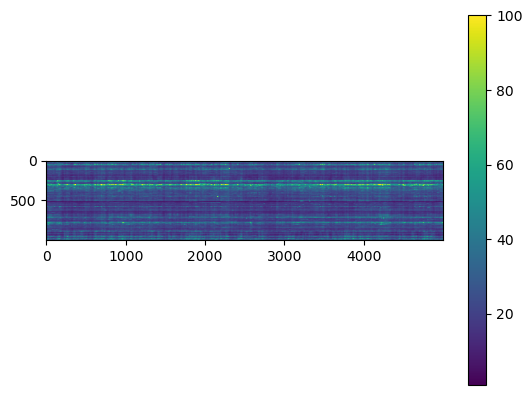

In [17]:
# plot the reponses as a heatmap
import matplotlib.pyplot as plt
plt.imshow(resp[0:1000,0:5000], vmax=100)
plt.colorbar()
plt.show()


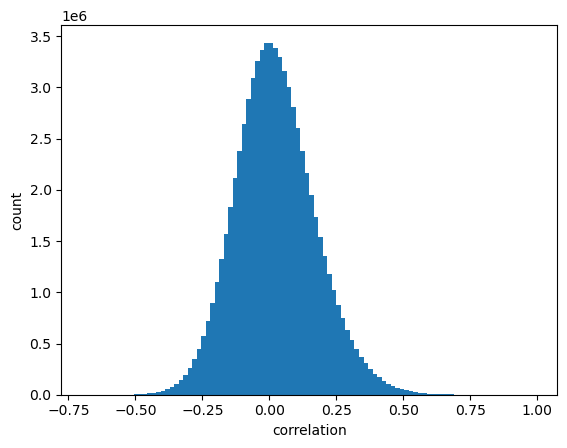

In [33]:
# plot the distribution of correlations
import matplotlib.pyplot as plt
plt.hist(corr[np.triu_indices_from(corr,1)], bins=100)
plt.xlabel('correlation')
plt.ylabel('count')
plt.show()


In [34]:
ct_df = client.materialize.query_table('aibs_soma_nuc_exc_mtype_preds_v117')

In [ ]:
ct_df

In [18]:
import platform

In [22]:
platform.platform()

'Linux-4.14.318-241.531.amzn2.x86_64-x86_64-with-glibc2.35'